In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Homework #2

![slider crank diagram: two links connected to a piston and the ground](../images/slider-crank.svg)

Consider the slider-crank shown above. Two links are connected by pins to the ground at $A$ and the piston at $C$. Link AB can rotate around $A$ and link BC can rotate around $C$ and the piston maintains contact with the ground. 

Consider the following kinematic properties:

- link AB $L_1 = 1~m$
- link BC $L_2 = 1~m$
- the angle of link AB rotates at a constant $\dot{\theta}_1 = 1~rad/s$


__1.__ How many degrees of freedom does the slider-crank have? _How many degrees of freedom and how many constraints?_

##### Answer:
Before constraints, we derive the unconstrained DOF for the system:
$$ bodies = 3 ; $$
$$ DOF_{unconstrainted} = bodies * 6 = 18 $$

We then determine our constraints:
- Part 1, 2 and 3 are planar (2D) (3 * 3 = 9)
- There are 3 revolute joints at A, B and C (2 * 3 = 6)
- There is 1 prismatic joint at C keeping the piston in contact with the ground (2 * 1 = 2)

The final DOF can then be calculated:

$$
constraints = 9+6+2 = 17
$$

$$
DOF = DOF_{unconstrainted} - constraints = 1
$$

This makes intuitive sense, as constraining any of the three bodies (i.e. removing an additional DOF) prevents any motion of the slider-crank

__2.__ The system begins to move with both links horizontal e.g. $\theta_1 = \theta_2 = 0^o$ and $\mathbf{r}_c = 2~m \hat{i}$. Find the positions of $A,~B,~and~C$ for one full rotation, $t = 0...2\pi$.

In [16]:
# Denoting links 'ab' & 'bc'
# Denoting points A, B and C

# Distance between links
ab = 1
bc = 1

a = np.linspace(0,2*np.pi)

A = np.zeros(shape=[2, 50])
B = np.array([np.cos(a), np.sin(a)])
C = np.array([(B[0] + np.sqrt(1-B[1]**2)), np.zeros(len(a))])


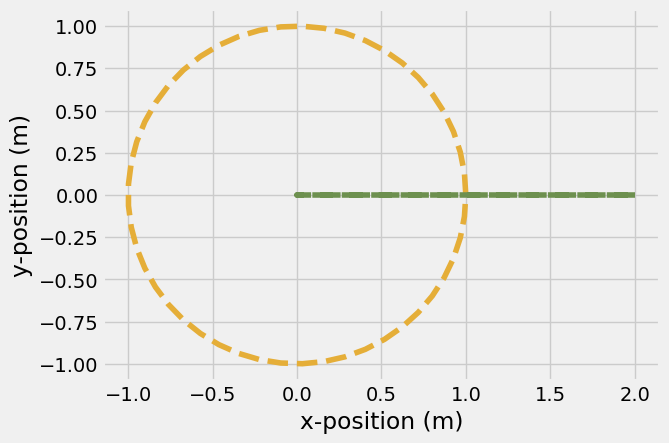

In [17]:
fig1, ax1 = plt.subplots()



ax1.set_xlabel('x-position (m)')
ax1.set_ylabel('y-position (m)')
ax1.set_aspect('equal', adjustable='box')

line, = ax1.plot([], [],'o-')
line2, = ax1.plot([], [],'o-')
line3, = ax1.plot([], [],'ro-')
line4, = ax1.plot([], [],'ro-')

ax1.plot(B[0,:],B[1,:],'--', label = 'path x1')
ax1.plot(C[0,:],C[1,:],'--', label = 'path x2')


In [18]:
from matplotlib import animation
from IPython.display import HTML

def animate2(i):
    '''function that updates the line data for the pendulum
    arguments:
    ----------
    i: index of timestep
    outputs:
    --------
    line: the line object plotted in the above ax.plot(...)
    '''
    line.set_data([B[0, i]], [B[1, i]])
    line2.set_data([C[0, i]], [C[1, i]])
    line3.set_data([A[0, i], B[0, i]], 
                    [A[1, i], B[1, i]])
    line4.set_data([B[0, i], C[0, i]], 
                    [B[1, i], C[1, i]])
                    
    return (line, line2, )

def init2():
    line.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    return (line,line2,line3,line4)

In [19]:
anim2 = animation.FuncAnimation(fig1, animate2, init_func=init2,
                               frames=range(0,len(a)), interval=50, 
                               blit=True)

HTML(anim2.to_html5_video())

__3.__ Plot the positions of $B~and~C$ vs time. 

##### Answer:

We are given the rotation speed as 1 radian per second. We can then calculate our time for a full 2pi rotation to be 6.28 seconds, allowing us to derive our position vs time graphs:

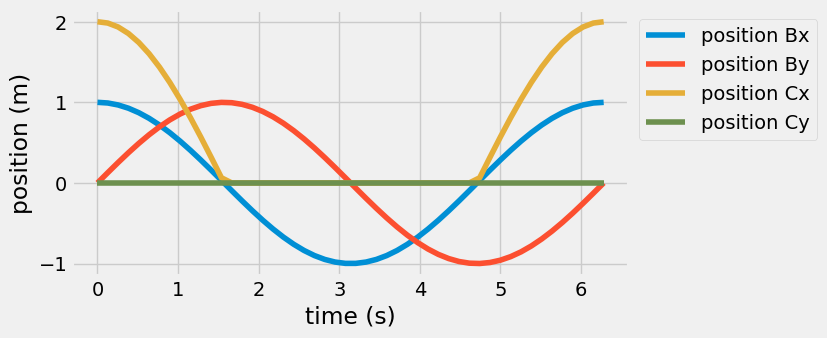

In [20]:
t = np.linspace(0, 6.28)

fig2, ax2 = plt.subplots()


ax2.set_xlabel('time (s)')
ax2.set_ylabel('position (m)')
ax2.set_aspect('equal', adjustable='box')

ax2.plot(t, B[0,:], '-', label = 'position Bx')
ax2.plot(t, B[1,:], '-', label = 'position By')
ax2.plot(t, C[0,:], '-', label = 'position Cx')
ax2.plot(t, C[1,:], '-', label = 'position Cy')
ax2.legend(bbox_to_anchor=(1,1))